# Featurizer

In [1]:
import sys
sys.path.insert(0,'..')
from featurizer import *

Load some mobile phone metadata. See {doc}`standardized data formats <../data_formats/cdr>` for file schemas. 

In [2]:
datastore = DataStore(cfg_dir='../configs/config.yml')
featurizer = Featurizer(datastore=datastore, clean_folders=True)

Loading CDR...
Loading recharges...
Loading mobile data...
Loading mobile data...
Loading antennas...


Remove duplicate records, filter to just a specific date range, remove outlier days and spammers based on call and text volumes, and remove duplicate records in CDR, recharges, mobile data records, and mobile money records.

In [3]:
# Deduplication
featurizer.ds.deduplicate()

# Filter to just January 5 - February 1 (inclusive)
featurizer.ds.filter_dates('2020-01-01', '2020-02-28')

# Remove transactions involving spammers who place 3+ calls/texts per active day
spammers = featurizer.ds.remove_spammers(spammer_threshold=1.8)

Number of spammers identified: 20


In [4]:
# Remove all records from days more than 2 standard deviations from the mean transaction volume
outlier_days = featurizer.ds.filter_outlier_days(num_sds=2)

Outliers removed: 2020-01-24, 2020-02-06


Produce summary statistics and plots.

In [5]:
print(featurizer.diagnostic_statistics())

{'CDR': {'Days': 60, 'Transactions': 92719, 'Subscribers': 980, 'Recipients': 980}, 'Recharges': {'Days': 60, 'Transactions': 9452, 'Subscribers': 782}, 'Mobile Data': {'Days': 60, 'Transactions': 9548, 'Subscribers': 591}, 'Mobile Money': {'Days': 60, 'Transactions': 5469, 'Subscribers': 682, 'Recipients': 682}}


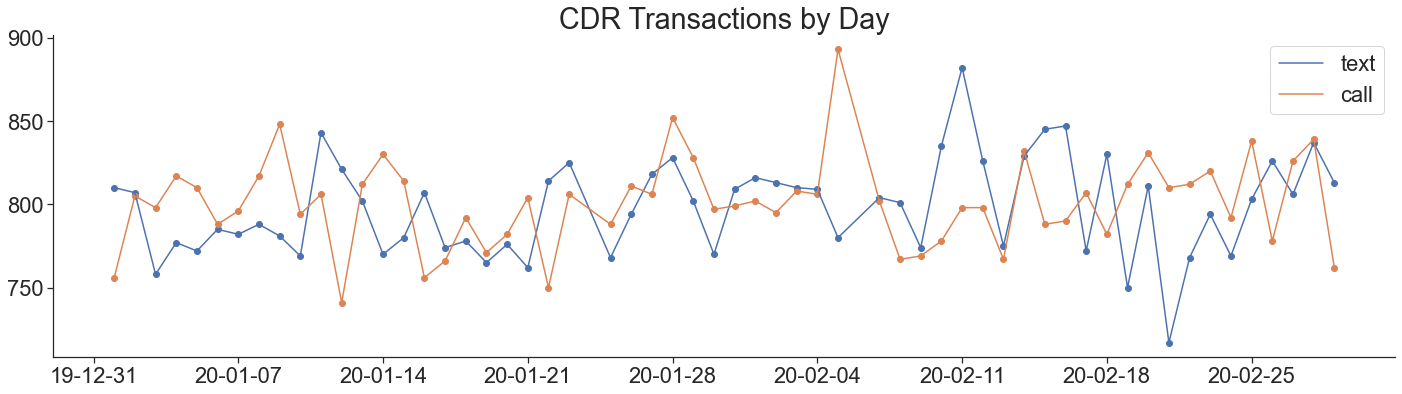

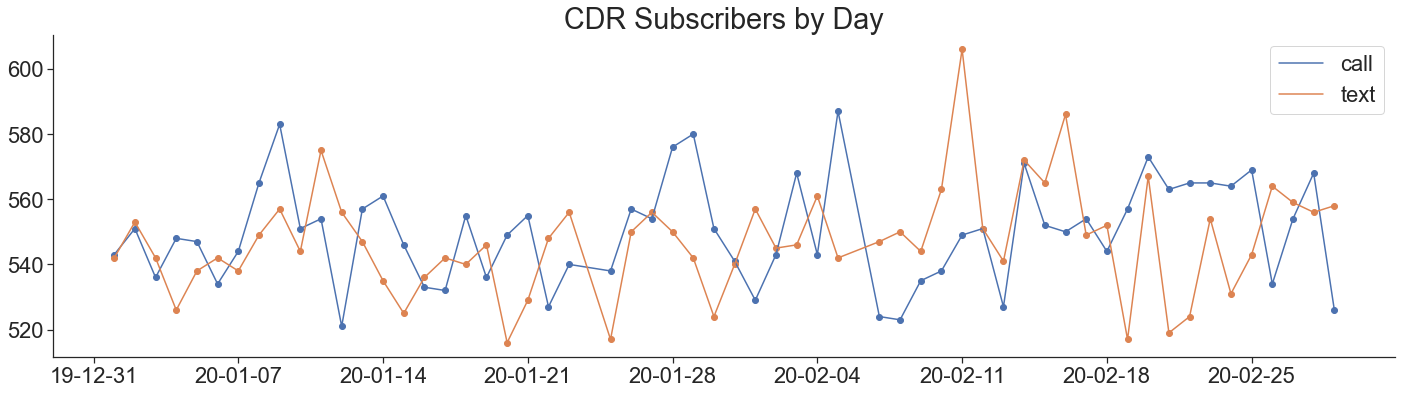

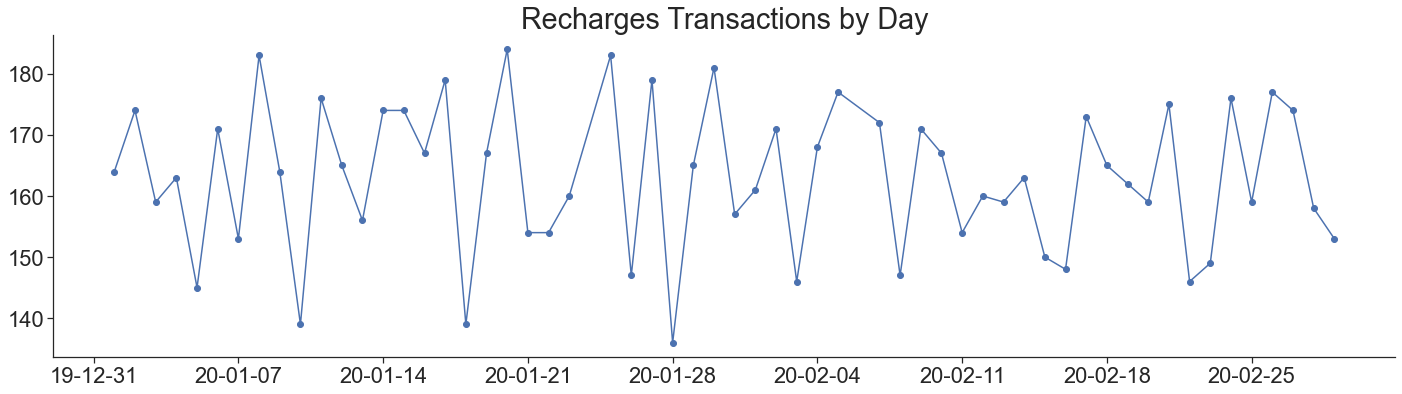

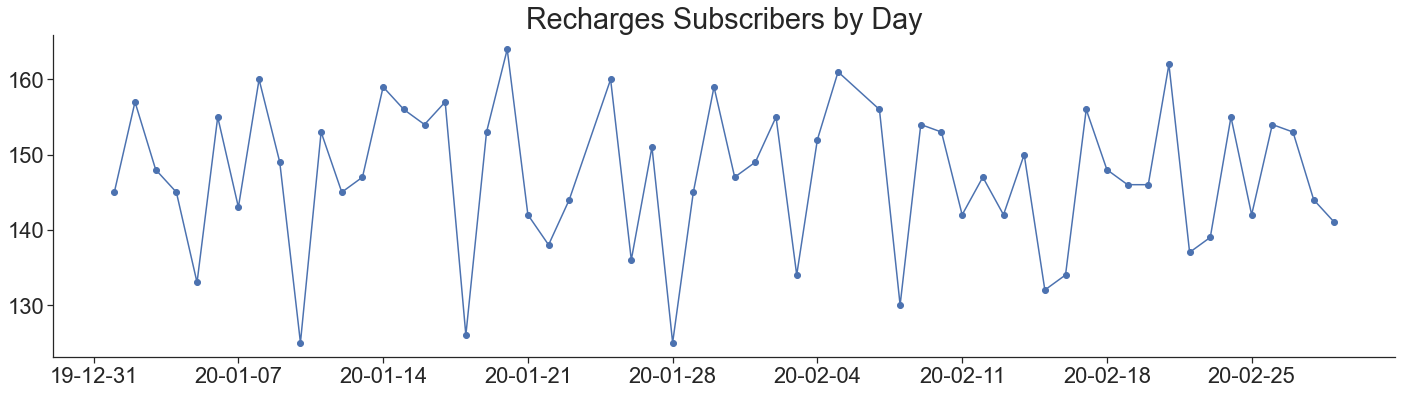

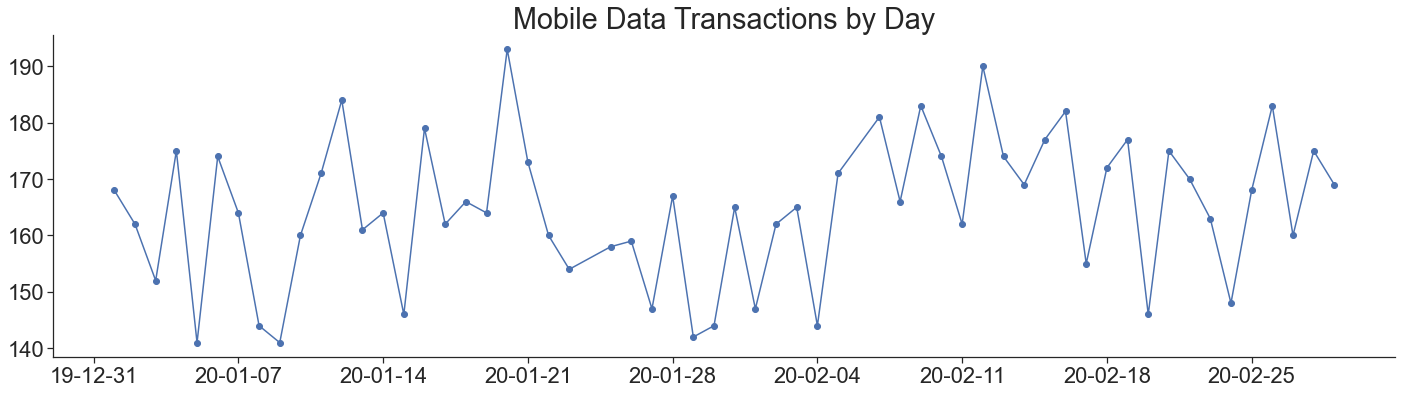

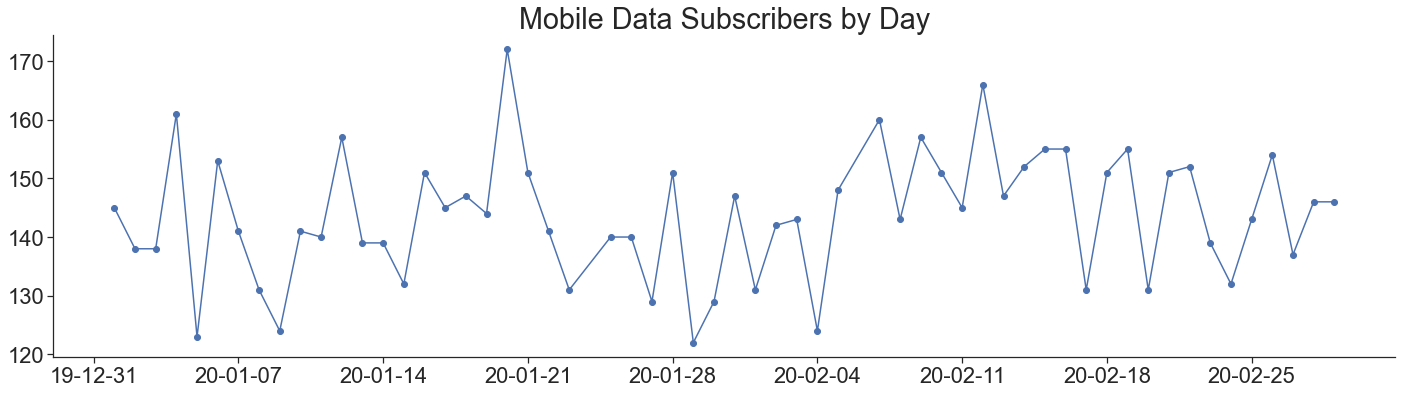

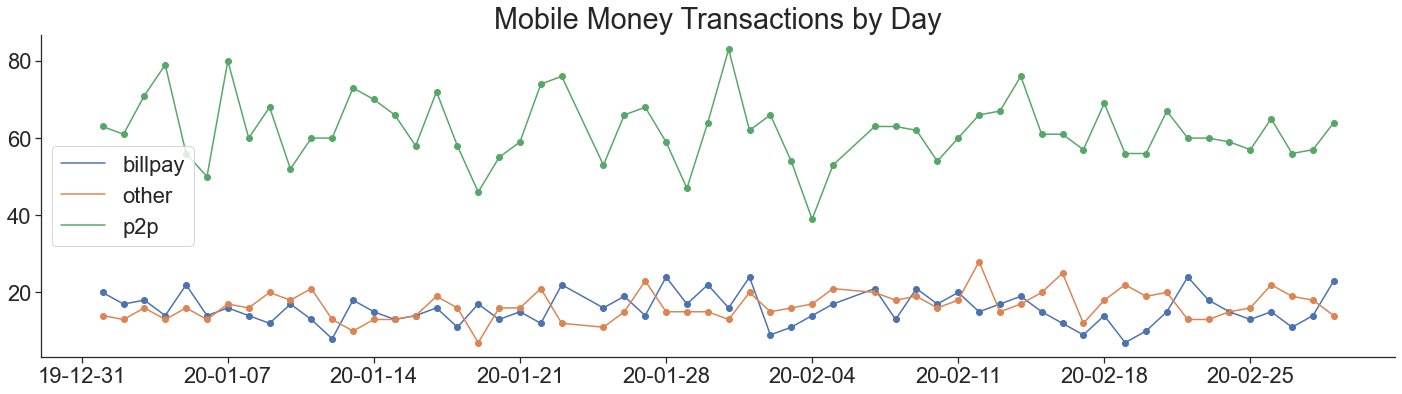

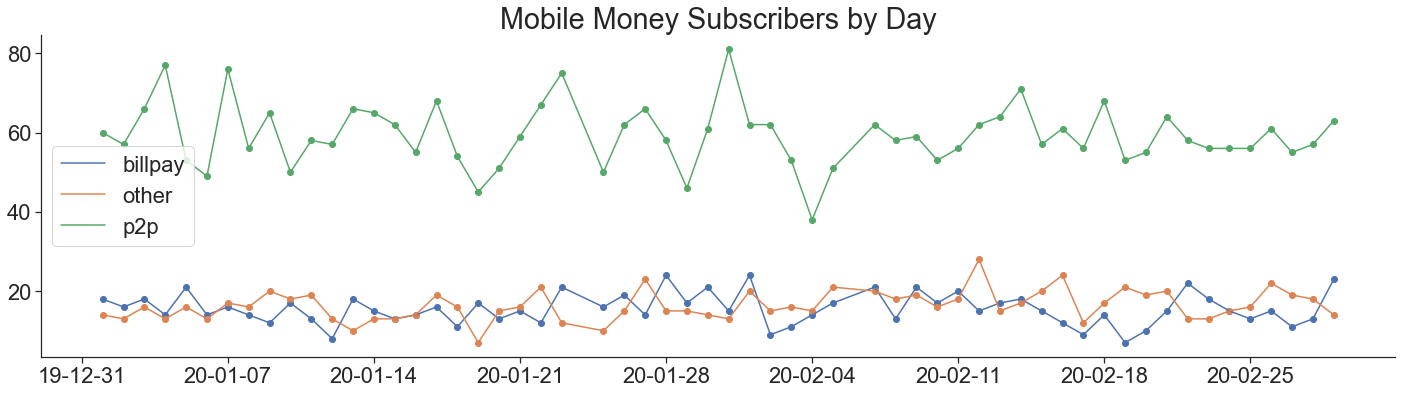

In [6]:
featurizer.diagnostic_plots()

Featurize the data

In [3]:
featurizer.cdr_features()
featurizer.international_features()
featurizer.location_features()
featurizer.recharges_features()
featurizer.mobiledata_features()
featurizer.mobilemoney_features()
featurizer.all_features()

Calculating CDR features...
Calculating international features...
Calculating spatial features...
Calculating recharges features...
Calculating mobile data features...
Calculating mobile money features...


In [4]:
pd.read_csv('../outputs/featurizer/datasets/features.csv').head()

,name,cdr_reporting__number_of_records,cdr_active_days__allweek__allday__callandtext,cdr_active_days__allweek__day__callandtext,cdr_active_days__allweek__night__callandtext,cdr_active_days__weekday__allday__callandtext,cdr_active_days__weekday__day__callandtext,cdr_active_days__weekday__night__callandtext,cdr_active_days__weekend__allday__callandtext,cdr_active_days__weekend__day__callandtext,...,mobilemoney_outgoing_p2p_amount_min,mobilemoney_outgoing_p2p_amount_max,mobilemoney_outgoing_p2p_balance_before_mean,mobilemoney_outgoing_p2p_balance_before_min,mobilemoney_outgoing_p2p_balance_before_max,mobilemoney_outgoing_p2p_balance_after_mean,mobilemoney_outgoing_p2p_balance_after_min,mobilemoney_outgoing_p2p_balance_after_max,mobilemoney_outgoing_p2p_txns,mobilemoney_outgoing_p2p_contacts
0,dsBHAdXrrk,184,58,46,50,41,32,35,17,14,...,26.361252,66.175190,198.212410,144.32855,270.12857,148.945410,78.153360,218.63590,8.0,8.0
1,JGPCbfDGes,209,59,49,50,42,35,34,17,14,...,33.154373,60.508873,166.658227,83.04488,209.16385,115.873907,22.536007,173.27129,6.0,6.0
2,dYwshzRseD,205,59,50,52,42,36,37,17,14,...,28.580658,63.042980,192.916470,136.88690,234.86200,152.284147,104.606220,200.48862,4.0,4.0
3,ygMEXUQDbn,218,56,51,46,41,37,34,15,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YtvkGlMWwe,212,57,52,45,41,38,31,16,14,...,35.715935,66.577260,182.742442,151.35474,245.24483,131.224984,91.455580,190.52692,6.0,6.0


Plot the distributions of some of the features.

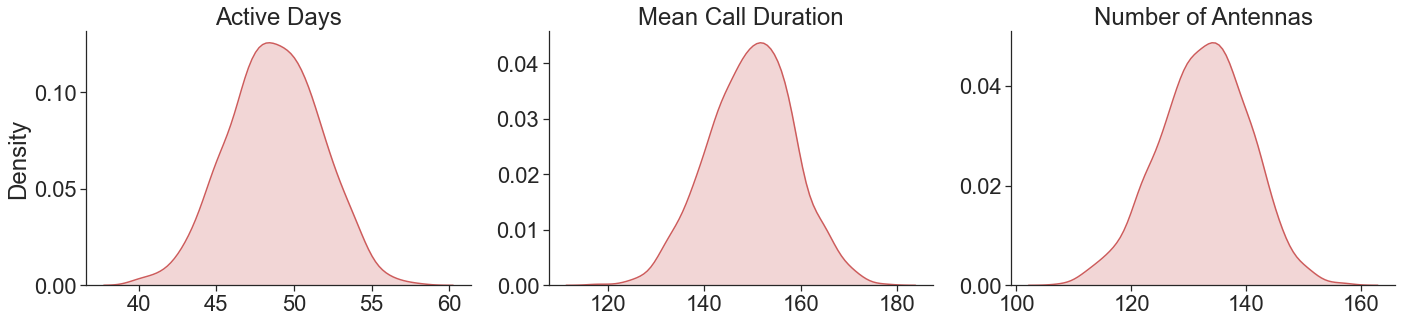

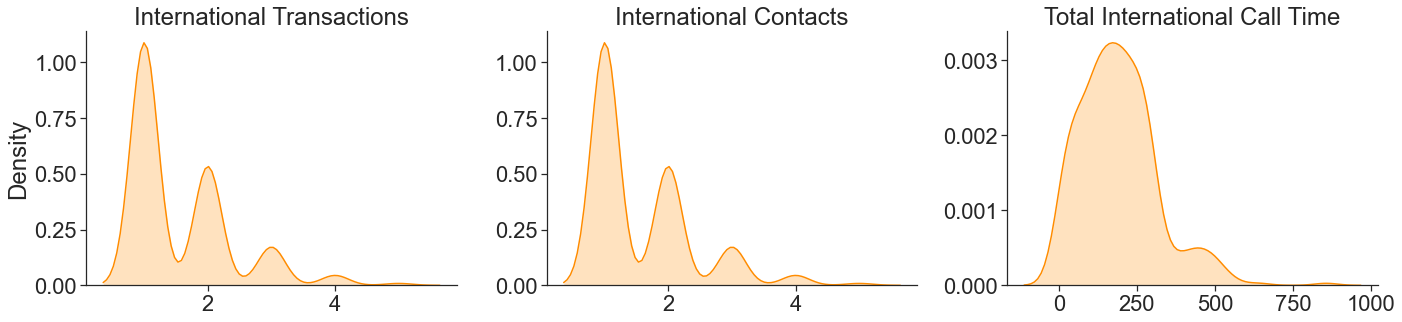

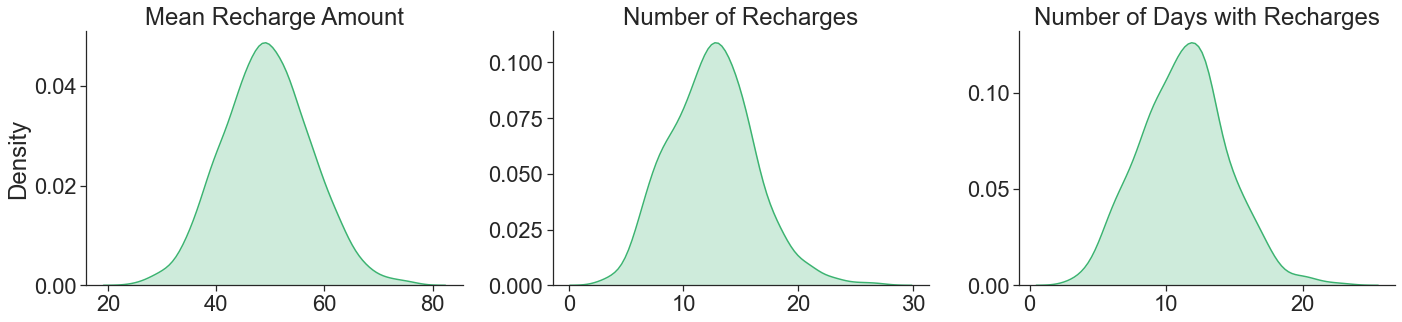

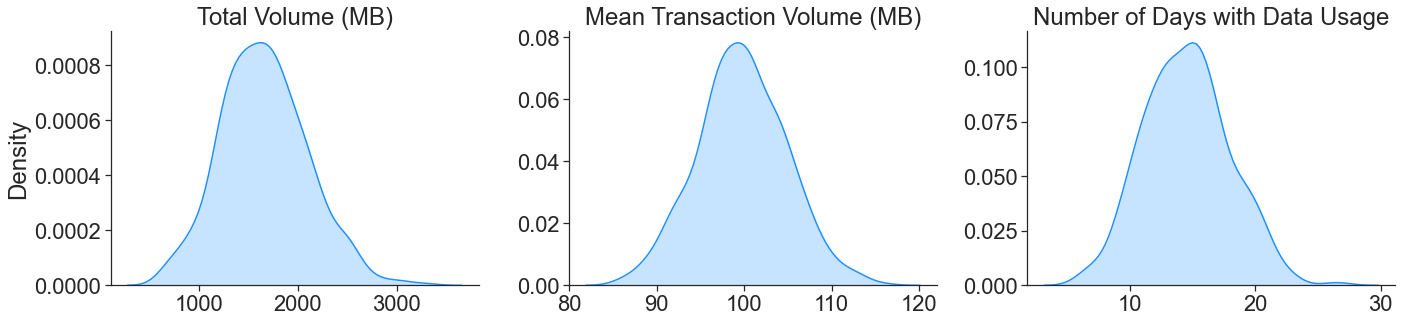

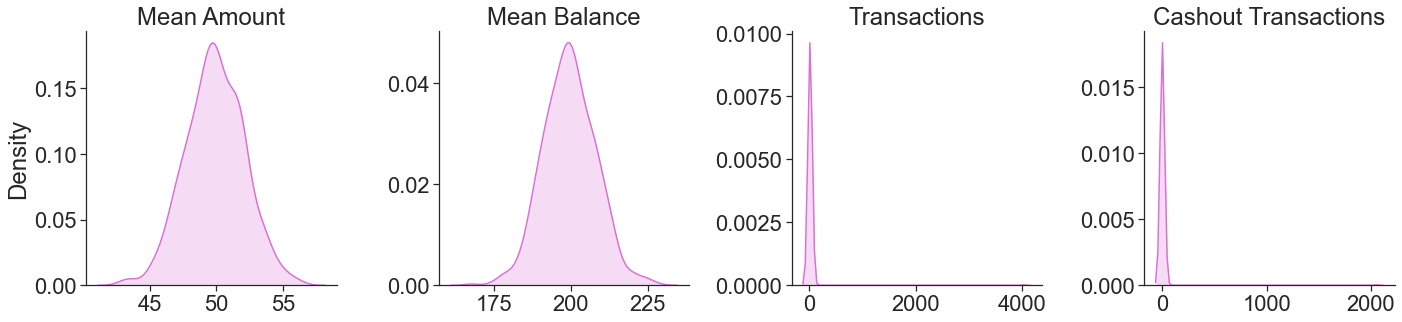

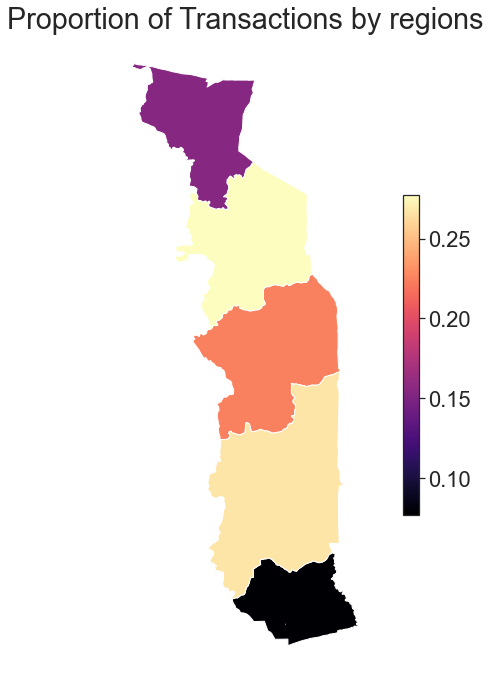

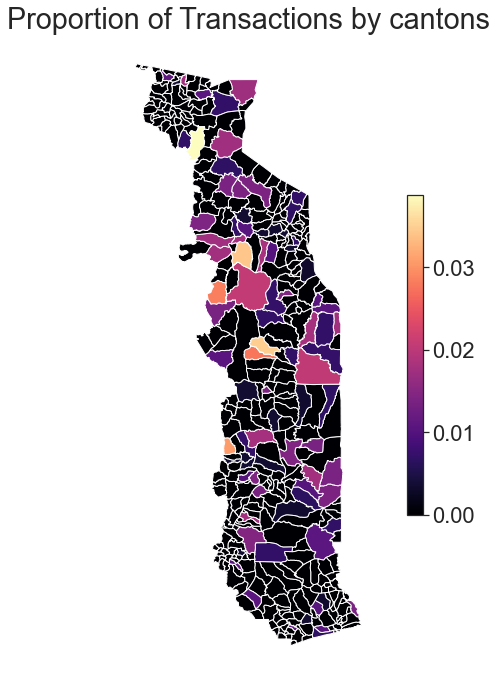

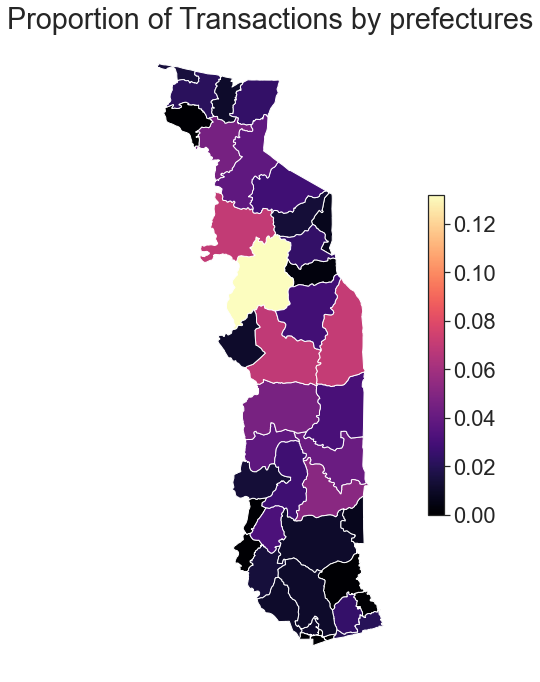

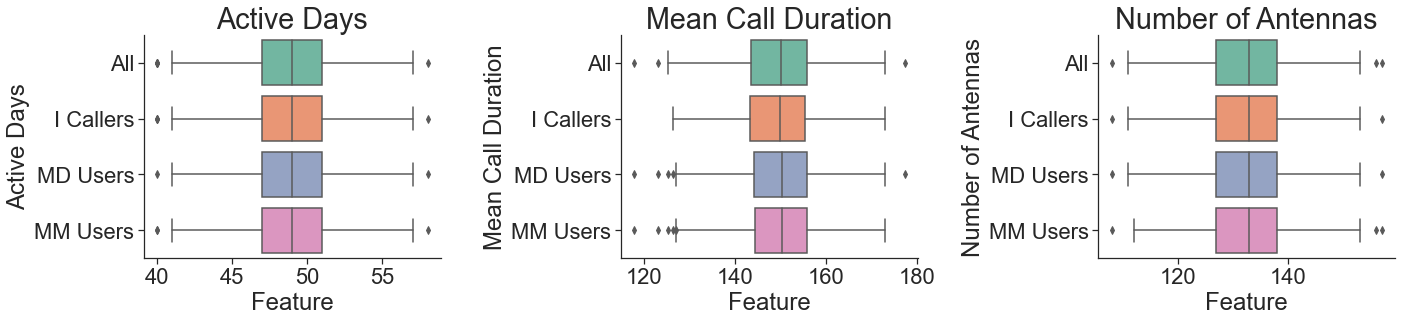

In [5]:
featurizer.feature_plots()